In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from NiaPy import Runner
from NiaPy.algorithms import BasicStatistics
from NiaPy.algorithms.basic import FishSchoolSearch
from NiaPy.algorithms.basic import FireflyAlgorithm
from NiaPy.algorithms.basic import ParticleSwarmAlgorithm
from NiaPy.task import StoppingTask, OptimizationType
from NiaPy.benchmarks import Rastrigin
from NiaPy.benchmarks import Rosenbrock
from NiaPy.benchmarks import Ackley

In [2]:
def optimization(benc, nruns, dim, algo, nf, ngen):
    Time = list()

    stats = np.zeros(nruns)
    x = list()
    y = list()
    print("\nstarting ", algo, benc)
    for i in range(nruns):
        task = StoppingTask(D=dim, nGEN=ngen, nFES=nf, optType=OptimizationType.MINIMIZATION, benchmark=benc)

        timer = time.perf_counter()
        best = algo.run(task)
        Time.append(time.perf_counter() - timer)

        stats[i] = best[1]
        x.append(best[0][0])
        y.append(best[0][1])

    stat = BasicStatistics(stats)
    print(stat.generate_standard_report()) 
    print("Execution time ", np.mean(Time))
    return x, y, task
    

Оптимизация функции Розенброка. На функции Розенброка FSS показал наилучший результат по точности минимизации и времени, FA показывает худший по времени результат, однако средний по остальным критериям


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x1543ec79e390> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x1543ec79e518>
Min: 0.006370897694791488, Max: 4.176228457795916, Mean: 0.6323921878086773, Median: 0.1942345419786785, Std. 1.28935459057093
Execution time  0.21088715579990094


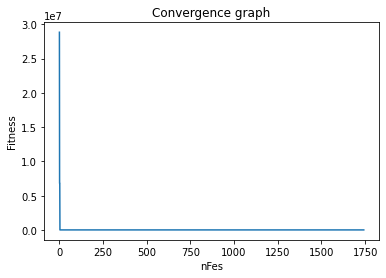


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x1543c08a6cc0> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x1543ec79e518>


/home/tatiana/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Min: 8.12991386244244e-05, Max: 6.113901528003201, Mean: 1.3951294600492659, Median: 0.48837610978808016, Std. 2.2322813644431614
Execution time  5.785070042500228


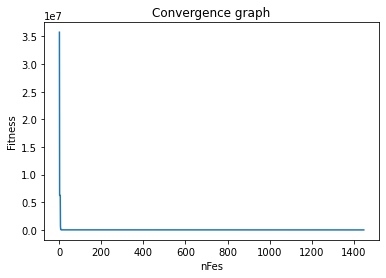


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x1543c0868c88> <NiaPy.benchmarks.rosenbrock.Rosenbrock object at 0x1543ec79e518>
Min: 0.008413630210195382, Max: 11.426365322489175, Mean: 3.898732474134165, Median: 2.564779269135189, Std. 3.7973942692193985
Execution time  0.26662513470000704


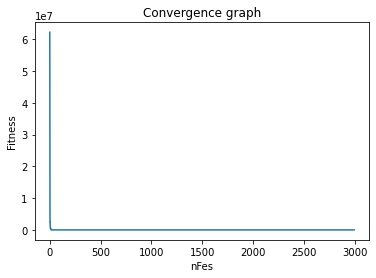

In [3]:
nruns = 10
dim = 2
nf = 3000
ngen = 3000
benc = Rosenbrock()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
x_fss, y_fss, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
x_ff, y_ff, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=30, C1=1, C2=1, w=0.5, vMin=-1, vMax=0.5)
x_spo, y_spo, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

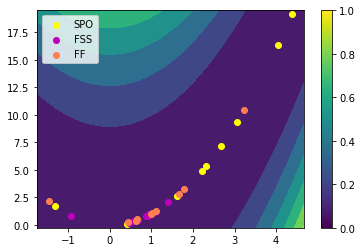

In [4]:
    x = np.linspace(min(x_spo + x_fss + x_ff) - 0.3, max(x_spo + x_fss + x_ff) + 0.3)
    y = np.linspace(min(y_spo + y_fss + y_ff) - 0.3, max(y_spo + y_fss + y_ff) + 0.3)
  
    u = []

    for i in y:        
        u.append([Rosenbrock.function(benc)(np.array(dim), (j, i)) for j in x])
        
    x, y = np.meshgrid(x, y)
    plt.contourf(x, y, u)
    
    plt.scatter(x_spo, y_spo, label="SPO", c='yellow')
    plt.scatter(x_fss, y_fss, label="FSS", c='m')
    plt.scatter(x_ff, y_ff, label="FF", c='coral')

    plt.legend()
    plt.colorbar()
    plt.show()

Оптимизация функции Растригина
На данном тесте PSO показал лучший результат по всем критериям, кроме max, FSS - средний


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x1543bff7a940> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x1543bff4db70>
Min: 0.008606237292966057, Max: 1.0065806609924337, Mean: 0.4142696377970353, Median: 0.3684153504042289, Std. 0.41285945037746874
Execution time  0.17503774740016526


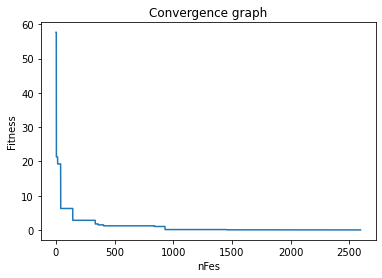


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x1543bffe7860> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x1543bff4db70>
Min: 1.9695355973681217e-05, Max: 1.9899537556037146, Mean: 0.7551217928894672, Median: 0.9949608544405564, Std. 0.6281776682314929
Execution time  5.278363150000223


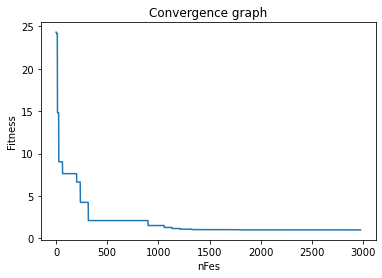


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x1543bfe14c50> <NiaPy.benchmarks.rastrigin.Rastrigin object at 0x1543bff4db70>
Min: 4.055759603716069e-07, Max: 0.994964764575549, Mean: 0.09987506603520657, Median: 9.03664218476763e-06, Std. 0.3145043562668814
Execution time  0.18305840060002082


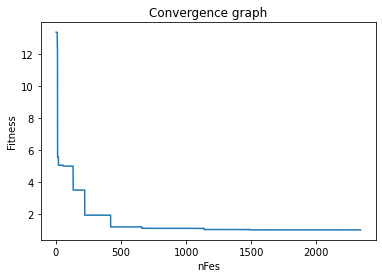

In [5]:
benc = Rastrigin()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
x_fss, y_fss, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
x_ff, y_ff, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
x_spo, y_spo, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

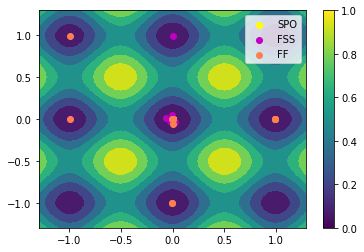

In [6]:
    x = np.linspace(min(x_spo + x_fss + x_ff) - 0.3, max(x_spo + x_fss + x_ff) + 0.3)
    y = np.linspace(min(y_spo + y_fss + y_ff) - 0.3, max(y_spo + y_fss + y_ff) + 0.3)
  
    u = []

    for i in y:        
        u.append([Rastrigin.function(benc)(np.array(dim), (j, i)) for j in x])
        
    x, y = np.meshgrid(x, y)
    plt.contourf(x, y, u)
    
    plt.scatter(x_spo, y_spo, label="SPO", c='yellow')
    plt.scatter(x_fss, y_fss, label="FSS", c='m')
    plt.scatter(x_ff, y_ff, label="FF", c='coral')

    plt.legend()
    plt.colorbar()
    plt.show()

Оптимизация функции Экли
На данной функции FSS снова показывает наилучший результат, в целом ситуация сложилась как в 1 тесте. PSO и FSS обладают хорошей скоростью, FA выдает достаточно неплохой результат, однако выполняется достаточно долго.


starting  <NiaPy.algorithms.basic.fss.FishSchoolSearch object at 0x1543bfd55dd8> <NiaPy.benchmarks.ackley.Ackley object at 0x1543bfd55ef0>
Min: 0.021469362701634243, Max: 3.6063972502275914, Mean: 1.0301772791677106, Median: 0.41335171890471445, Std. 1.321475573266912
Execution time  0.2839696908997212


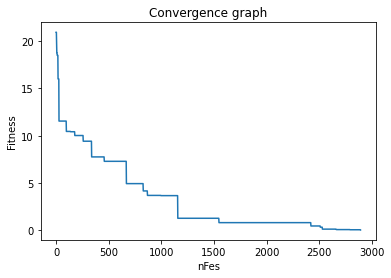


starting  <NiaPy.algorithms.basic.fa.FireflyAlgorithm object at 0x1543bfd431d0> <NiaPy.benchmarks.ackley.Ackley object at 0x1543bfd55ef0>
Min: 0.0017402820085554715, Max: 1.3037828157630398, Mean: 0.13328529090400326, Median: 0.0027728722268069994, Std. 0.4112744288912065
Execution time  4.343541059900053


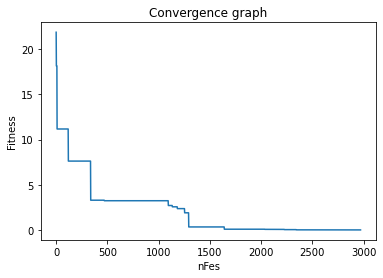


starting  <NiaPy.algorithms.basic.pso.ParticleSwarmAlgorithm object at 0x1543c08f5ef0> <NiaPy.benchmarks.ackley.Ackley object at 0x1543bfd55ef0>
Min: 0.0024639116431228736, Max: 8.616325212876319, Mean: 2.272528459638009, Median: 0.1185529808022765, Std. 3.2586220188819626
Execution time  0.25635491119992365


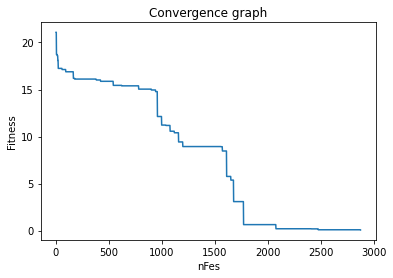

In [7]:
benc = Ackley()

# поиск косяком рыб
algo = FishSchoolSearch(NP=40, SI_init=0.3, SI_final=5, SV_init=0.3, SV_final=5, min_w=0.2, w_scale=0.8)
x_fss, y_fss, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# алгоритм светлячков
algo = FireflyAlgorithm(NP=40)
x_ff, y_ff, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

# рой частиц
algo = ParticleSwarmAlgorithm(NP=40)
x_spo, y_spo, task = optimization(benc, nruns, dim, algo, nf, ngen)
task.plot()

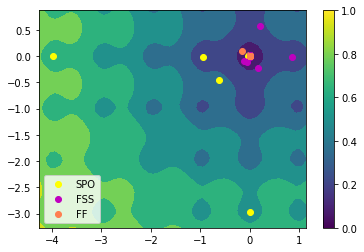

In [8]:
    x = np.linspace(min(x_spo + x_fss + x_ff) - 0.3, max(x_spo + x_fss + x_ff) + 0.3)
    y = np.linspace(min(y_spo + y_fss + y_ff) - 0.3, max(y_spo + y_fss + y_ff) + 0.3)
  
    u = []

    for i in y:        
        u.append([Ackley.function(benc)(np.array(dim), (j, i)) for j in x])
        
    x, y = np.meshgrid(x, y)
    plt.contourf(x, y, u)
    
    plt.scatter(x_spo, y_spo, label="SPO", c='yellow')
    plt.scatter(x_fss, y_fss, label="FSS", c='m')
    plt.scatter(x_ff, y_ff, label="FF", c='coral')

    plt.legend()
    plt.colorbar()
    plt.show()

При увеличении количества итераций до 1000 и количества вызова функций до 10000 алгоритм FSS показывает еще более точный результат, однако начинает проигрывать по времени PSO (1,1 на Экли против 0,1 у PSO), однако точность PSO не увеличивается, как и у FA. Можно сказать, что FSS достаточно хорош по точности как при жестких ограничениях на количество итераций\вызова функций, так и при более мягких ограничениях (при этом выдает наилучшие результаты при более мягких) что является его основным преимуществом. Недостатком является скорость, относительно PSO (который не улучшает своих результатов).